In [2]:
# Pyspark Project

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [15]:
from pyspark import SQLContext

In [16]:
sqlContext = SQLContext(sc)

In [21]:
df = sqlContext.read.csv("C:/Users/alanj/OneDrive/Desktop/Unstructured Data/news.csv", header=True)

In [23]:
df.show()

+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|_c0|             authors|               title|        publish_date|         description|                text|                 url|
+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  0|        ['Cbc News']|Coronavirus a 'wa...| 2020-03-27 08:00:00|Canadian pharmaci...|"Canadian pharmac...|"" he said.  Tadr...|
|  1|        ['Cbc News']|Yukon gov't names...| 2020-03-27 01:45:00|The Yukon governm...|"The Yukon govern...|  from March 9 to 13|
|  2|['The Associated ...|U.S. Senate passe...| 2020-03-26 05:13:00|The Senate has pa...|"The Senate late ...|"" said Democrati...|
|  3|        ['Cbc News']|Coronavirus: The ...| 2020-03-27 00:36:00|Scientists around...|"Scientists aroun...| "" said Zarychanski|
|  4|        ['Cbc News']|The latest on the...| 2020-03-26 20:57:00|The late

In [24]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- title: string (nullable = true)
 |-- publish_date: string (nullable = true)
 |-- description: string (nullable = true)
 |-- text: string (nullable = true)
 |-- url: string (nullable = true)



In [25]:
df.select("title").show()

+--------------------+
|               title|
+--------------------+
|Coronavirus a 'wa...|
|Yukon gov't names...|
|U.S. Senate passe...|
|Coronavirus: The ...|
|The latest on the...|
|'Worse' pandemic ...|
|What you need to ...|
|Michigan hospital...|
|U.S. coronavirus ...|
|'Avoid the emerge...|
|COVID-19 in Sask:...|
| 'Jorgebarrera Or...|
|How invoking the ...|
| 'As The Late Lin...|
|Alberta's film in...|
| 'The World Cup I...|
|N.L. fisheries re...|
|1st death, 3 new ...|
| 'Caroline.Bargho...|
|It's 'too late' f...|
+--------------------+
only showing top 20 rows



In [28]:
df.select("text").show()

+--------------------+
|                text|
+--------------------+
|"Canadian pharmac...|
|"The Yukon govern...|
|"The Senate late ...|
|"Scientists aroun...|
|"    Trudeau says...|
|"The continued ex...|
|Recent developmen...|
|Michigan hospital...|
|"The number of co...|
|"The Jewish Gener...|
|" Three Saskatche...|
|Manitoba chiefs o...|
|"This column is a...|
| 2020-03-27 08:00:00|
|"Alberta's TV and...|
|'Like a war zone'...|
|"A Memorial Unive...|
|"Manitoba is unde...|
| 2020-03-26 08:00:00|
|"New Brunswick ha...|
+--------------------+
only showing top 20 rows



In [32]:
import pyspark.sql.functions as F
from pyspark.sql.types import *

In [41]:
def wordCount(wordString):
    res = sum([i.strip(string.punctuation).isalpha() for i in wordString.split()]) 
    return res

udfWC = F.udf(wordCount, IntegerType())

In [43]:
df_wc = df.withColumn("word count", udfWC("text"))

df_wc.select("word count").show()

+----------+
|word count|
+----------+
|       153|
|        97|
|       120|
|       239|
|       129|
|        43|
|      1747|
|       120|
|       206|
|       110|
|       315|
|         8|
|       289|
|         0|
|       147|
|        16|
|        63|
|       138|
|         0|
|        65|
+----------+
only showing top 20 rows



In [36]:
import string
wordString = "Geeksforgeeks,    is best @# Computer Science Portal.!!!"
  
# printing original string 

print ("The original string is : " +  wordString) 
  
# using sum() + strip() + split() 
# to count words in string 
res = sum([i.strip(string.punctuation).isalpha() for i in wordString.split()]) 
  
# printing result 
print ("The number of words in string are : " +  str(res))

The original string is : Geeksforgeeks,    is best @# Computer Science Portal.!!!
The number of words in string are : 6


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

dfPD = df_wc.toPandas()


In [45]:
dfPD.head()

,_c0,authors,title,publish_date,description,text,url,word count
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,"""Canadian pharmacies are limiting how much med...",""""" he said. Tadrous said pharmacies get their...",153
1,1,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,"""The Yukon government has identified two place...",from March 9 to 13,97
2,2,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,"""The Senate late Wednesday passed an unparalle...",""""" said Democratic Senate Minority Leader Chuc...",120
3,3,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,"""Scientists around the world are racing to fin...",""""" said Zarychanski",239
4,4,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,""" Trudeau says rules of Quarantine Act will...",""""" Prime Minister Justin Trudeau said today",129


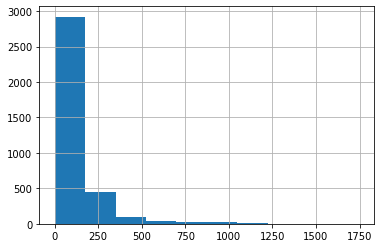

In [49]:
dfPD["word count"].hist()